In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Libraries Used for the Research

In [2]:
import os as ind_defect_os
import cv2 as ind_defect_cv2
import matplotlib.pyplot as ind_defect_mplt
import numpy as ind_defect_npy
from sklearn.model_selection import train_test_split as ind_defect_tnttsplit

### Data Loading

In [3]:
defective_casting_pdt_pathh = 'Dataset/def_front'
good_casting_pdt_pathh  = 'Dataset/ok_front'

defective_casting_img = ind_defect_os.listdir(defective_casting_pdt_pathh)
good_casting_img = ind_defect_os.listdir(good_casting_pdt_pathh)
print(f"Total number of Defective Casting product images    : {len(defective_casting_img)}")
print(f"Total number of Non-Defective Casting product images: {len(good_casting_img)}")

Total number of Defective Casting product images    : 781
Total number of Non-Defective Casting product images: 519


### Visualization of grayscale (1 Channel)

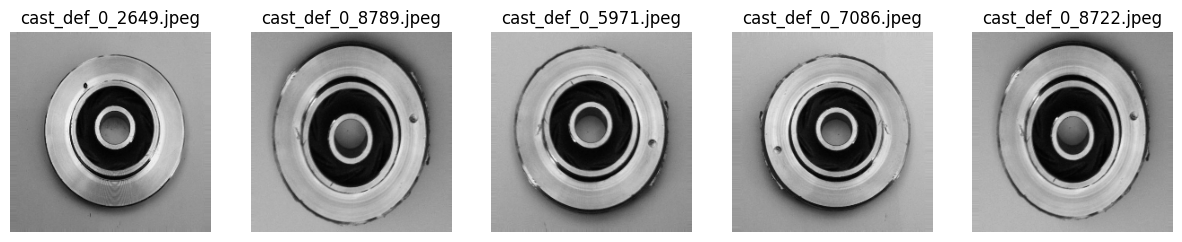

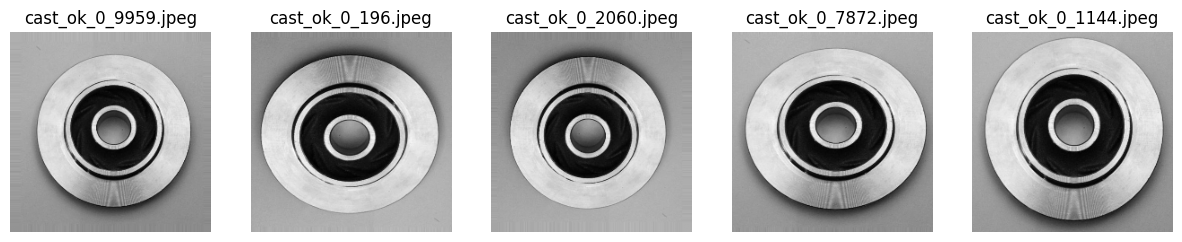

In [4]:
# Function for Grayscale visualization
def initial_data_visuals(folder_path, image_list, num_images=5):
    ind_defect_mplt.figure(figsize=(15, 3))
    for c_id in range(num_images):
        castingfile = image_list[c_id]
        castingpath = ind_defect_os.path.join(folder_path, castingfile)

        product = ind_defect_cv2.imread(castingpath)
        if product is None:
            continue

        #converting the images to greyscale
        grayscaled = ind_defect_cv2.cvtColor(product, ind_defect_cv2.COLOR_BGR2GRAY)
        remeasured = ind_defect_cv2.resize(grayscaled, (224, 224))  #resizing the images to 224×224
        ind_defect_mplt.subplot(1, num_images, c_id + 1)
        ind_defect_mplt.imshow(remeasured, cmap='gray')
        ind_defect_mplt.title(castingfile, fontsize=12)
        ind_defect_mplt.axis('off')
    ind_defect_mplt.show()

# Display 5 defective and 5 ok images
initial_data_visuals(defective_casting_pdt_pathh, defective_casting_img)
initial_data_visuals(good_casting_pdt_pathh, good_casting_img)

### Visualization Quasi-RGB (3 Channels)

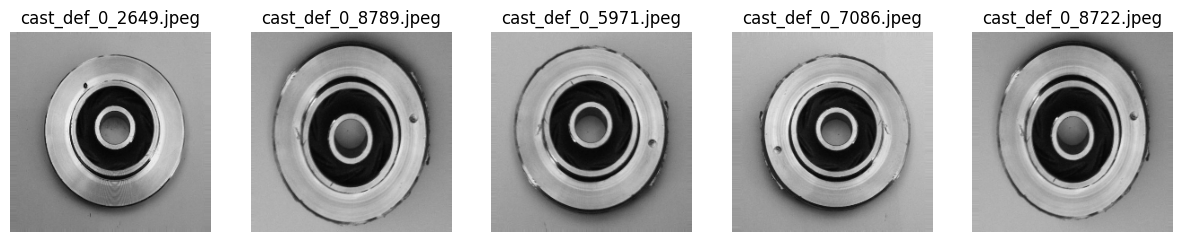

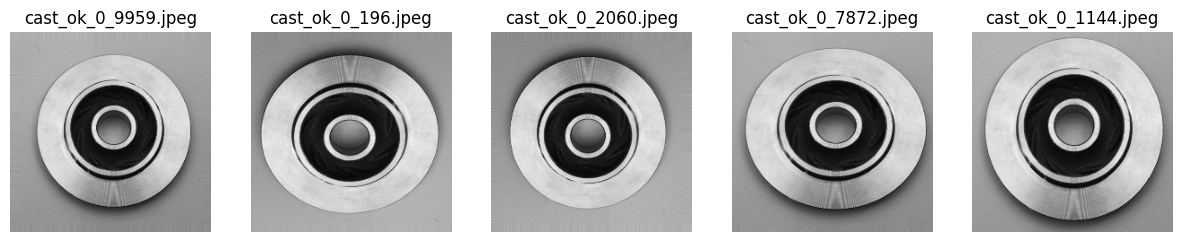

In [5]:
def initial_data_visuals_quasi_rgb(folder_path, image_list, num_images=5):
    ind_defect_mplt.figure(figsize=(15, 3))
    for c_id in range(num_images):
        castingfile = image_list[c_id]
        castingpath = ind_defect_os.path.join(folder_path, castingfile)

        product = ind_defect_cv2.imread(castingpath, ind_defect_cv2.IMREAD_GRAYSCALE)  # Load as grayscale
        if product is None:
            continue

        remeasured = ind_defect_cv2.resize(product, (224, 224))  # Resize

        # Convert grayscale to quasi-RGB by stacking 3 channels
        quasi_rgb = ind_defect_cv2.merge([remeasured, remeasured, remeasured])

        ind_defect_mplt.subplot(1, num_images, c_id + 1)
        ind_defect_mplt.imshow(quasi_rgb)
        ind_defect_mplt.title(castingfile, fontsize=12)
        ind_defect_mplt.axis('off')
    ind_defect_mplt.show()

# Display 5 defective and 5 ok images in quasi-RGB
initial_data_visuals_quasi_rgb(defective_casting_pdt_pathh, defective_casting_img)
initial_data_visuals_quasi_rgb(good_casting_pdt_pathh, good_casting_img)